In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
uploaded = pd.read_csv('Bev Base Dearation Data Extract .csv')
# Dataset is now stored in a Pandas Dataframe

In [4]:
uploaded.head()

,SKU,SKU_DESCRIPTION,BATCHID,Recipe,Tank,Unit,Instruction_Step,Source,Material_ID,Material_Name,...,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Batch_Phase_Type,Deaeration Phase
0,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,S3_BATCH_IN_PROGRESS,TANK_STATUS,NaN,NaN,...,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,Batch start up,0
1,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1002565,WATER TREATED,...,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,Treated water bulk addition,0
2,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,PLEASE VERIFY BULK ADDITION,PROMPT,NaN,NaN,...,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,Prompt,0
3,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1037802,S813 SOD BENZOATE XFX25,...,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,Manadd addition,0
4,1002150,BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B,107643491,10166969:P_BBS25_50171888_00\EM_25MT_NOGUM_SEQ...,U_25,U_25MT03,STEP1_CONS,CONS,1002818,S651 CITRIC ACID ANH BG XFX25,...,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,Manadd addition,0


In [5]:
# Or rename the existing DataFrame (rather than creating a copy)
uploaded.rename(columns={'SKU': 'Material','Deaeration Phase':'Deaeration_Phase'}, inplace=True)

In [6]:
uploaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9487 entries, 0 to 9486
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Material               9487 non-null   int64  
 1   SKU_DESCRIPTION        9487 non-null   object 
 2   BATCHID                9487 non-null   int64  
 3   Recipe                 9487 non-null   object 
 4   Tank                   9487 non-null   object 
 5   Unit                   9487 non-null   object 
 6   Instruction_Step       9462 non-null   object 
 7   Source                 9487 non-null   object 
 8   Material_ID            2443 non-null   object 
 9   Material_Name          1980 non-null   object 
 10  Quantity               9487 non-null   float64
 11  Phase_start            9487 non-null   object 
 12  Phase_end              9487 non-null   object 
 13  Phase_duration         9487 non-null   int64  
 14  Phase_start_delay      9487 non-null   int64  
 15  Phas

In [7]:
#uploaded.describe().T

## Determining the Tank Quantities available 

In [8]:
#Select all the rows where the phase HP is in the list below - HP is homogenisation of the final batch quantity
Instruction_Step = ['HP']
df_TankQuantity = uploaded[uploaded['Instruction_Step'].isin(Instruction_Step)]
print(df_TankQuantity)

      Material                           SKU_DESCRIPTION    BATCHID Recipe  \
11     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491     HP   
16     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107643491     HP   
38     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107762133     HP   
43     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107762133     HP   
65     1002150  BCH Q-CI-5.12/.201/CI/Q54.00/V-54.10 P2B  107829859     HP   
...        ...                                       ...        ...    ...   
9424   3044756                         BCH LE/B-12.00 P2  107940278     HP   
9446   3044756                         BCH LE/B-12.00 P2  108041496     HP   
9451   3044756                         BCH LE/B-12.00 P2  108041496     HP   
9474   3055706                      BCH LE/A/B-809.00 P2  107737576     HP   
9479   3055706                      BCH LE/A/B-809.00 P2  107737576     HP   

      Tank      Unit Instruction_Step Source Material_ID Materi

In [9]:
# Group data by tank names and calculate average Quantity
grouped_df = df_TankQuantity.groupby('Unit')['Quantity'].mean().reset_index()
grouped_df

,Unit,Quantity
0,U_22MT01,18258.020125
1,U_22MT02,17442.148714
2,U_22MT03,17516.904545
3,U_22MT04,18313.822955
4,U_22MT05,16892.826667
5,U_23MT01,18317.464529
6,U_23MT02,18748.671826
7,U_23MT03,18633.034176
8,U_23MT04,18625.372000
9,U_23MT05,18769.750146


In [10]:
# Removal of unwanted columns from dataset
uploaded1=uploaded.drop(['SKU_DESCRIPTION', 'Recipe', 'Tank','Source', 'Batch_Phase_Type'], axis=1)

In [11]:
# Define a dictionary of replacements
replacements = {
    'U_25MT02': '2502',
    'U_25MT03': '2503',
    'U_25MT04': '2504',
    'U_26MT01' : '2601',
    'U_23MT02' : '2302',
    'U_23MT04' : '2304',
    'U_25MT01' : '2501',
    'U_23MT05' : '2305',
    'U_25MT02' : '2502',
    'U_22MT04' : '2204',
    'U_22MT03' : '2203',
    'U_22MT02' : '2202',
    'U_26MT04' : '2604',
    'U_26MT03' : '2603',
    'U_23MT03' : '2303',
    'U_22MT05' : '2205'
}

# Replace values in the 'TankName' column
uploaded['Unit'].replace(replacements, inplace=True)

# Print the modified DataFrame
print(uploaded1)

      Material    BATCHID      Unit  \
0      1002150  107643491  U_25MT03   
1      1002150  107643491  U_25MT03   
2      1002150  107643491  U_25MT03   
3      1002150  107643491  U_25MT03   
4      1002150  107643491  U_25MT03   
...        ...        ...       ...   
9482   3055706  107737576  U_25MT02   
9483   3055706  107737576  U_25MT02   
9484   3055706  107737576  U_25MT02   
9485   3055706  107737576  U_25MT02   
9486   3055706  107737576  U_25MT02   

                                   Instruction_Step Material_ID  \
0                              S3_BATCH_IN_PROGRESS         NaN   
1                                        STEP1_CONS     1002565   
2                       PLEASE VERIFY BULK ADDITION         NaN   
3                                        STEP1_CONS     1037802   
4                                        STEP1_CONS     1002818   
...                                             ...         ...   
9482               TAKE A SAMPLE AND SUBMIT FOR QA.         Na

In [12]:
# Create A new csv file with tank names updated 
uploaded1.to_csv('C:/Users/User/Desktop/Thesis 2023/Capstone---CCT/uploaded1.csv')

In [13]:
#How can we get a summary of categorical data? The value_counts() method will be useful in this case.
#Material=uploaded.Material.value_counts()
#Material

### Investigation of the Deaeration Phase  

In [14]:
# Determine how many materials have a deaeration phases
#DeaerationPhase =uploaded.Deaeration_Phase.value_counts()
#DeaerationPhase

In [15]:
#Select all the rows where the material is in the list below
#Deaeration_Phase = [1]
#df_filtered = uploaded[uploaded['Deaeration_Phase'].isin(Deaeration_Phase)]
#print(df_filtered)

In [16]:
#Select all the rows where the material is in the list below
Instruction_Step = ['STEP2_CONS']
df_filtered = uploaded1[uploaded1['Instruction_Step'].isin(Instruction_Step)]
print(df_filtered)

      Material    BATCHID      Unit Instruction_Step Material_ID  \
33     1002150  107762133  U_25MT03       STEP2_CONS  U_86MT14_1   
34     1002150  107762133  U_25MT03       STEP2_CONS  U_85MT22_1   
60     1002150  107829859  U_25MT04       STEP2_CONS  U_86MT06_1   
61     1002150  107829859  U_25MT04       STEP2_CONS  U_85MT11_1   
87     1002150  107916883  U_25MT04       STEP2_CONS  U_86MT11_1   
...        ...        ...       ...              ...         ...   
9361   3044756  107916904  U_25MT03       STEP2_CONS  U_85MT24_1   
9388   3044756  107926393  U_25MT03       STEP2_CONS  U_86MT08_1   
9415   3044756  107940278  U_25MT03       STEP2_CONS  U_86MT12_1   
9442   3044756  108041496  U_25MT04       STEP2_CONS  U_85MT11_1   
9470   3055706  107737576  U_25MT02       STEP2_CONS  U_85MT44_1   

     Material_Name  Quantity       Phase_start         Phase_end  \
33             NaN   318.100  31/05/2022 01:28  31/05/2022 01:35   
34             NaN   934.900  31/05/2022 01:35 

In [17]:
 #Aggregate data per tank
aggregated_df = df_filtered.groupby('Material').agg({
    'Phase_duration': 'mean',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum'
    
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_df)

    Material  Phase_duration  Phase_overrun  Phase_start_delay
0    1002150       31.900000          225.0               1650
1    1002373       14.333333           13.0               1278
2    1006884       17.666667           32.0               1744
3    1036590       17.000000           96.0               7734
4    1045448       18.000000           91.0              17940
5    1172415       36.218750          674.0               9276
6    1172898       13.875000           34.0               1615
7    1172919       17.090909           68.0               6713
8    1172993       41.000000           32.0                557
9    1206154       17.333333           41.0               6203
10   1290229       12.000000            3.0                 54
11   1368236       33.333333          174.0               2910
12   1397022       52.800000          656.0              27835
13   1399322       13.666667           14.0                861
14   1418373       44.500000          354.0            

In [18]:
df_filtered.drop_duplicates()

,Material,BATCHID,Unit,Instruction_Step,Material_ID,Material_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration_Phase
33,1002150,107762133,U_25MT03,STEP2_CONS,U_86MT14_1,NaN,318.100,31/05/2022 01:28,31/05/2022 01:35,7,215,10,45.4429,45.2833,7,0.0,1
34,1002150,107762133,U_25MT03,STEP2_CONS,U_85MT22_1,NaN,934.900,31/05/2022 01:35,31/05/2022 01:46,11,0,11,84.9909,79.0160,12,0.0,0
60,1002150,107829859,U_25MT04,STEP2_CONS,U_86MT06_1,NaN,118.700,21/07/2022 21:00,21/07/2022 21:19,19,486,10,6.2474,29.5400,4,15.0,1
61,1002150,107829859,U_25MT04,STEP2_CONS,U_85MT11_1,NaN,1133.800,21/07/2022 21:19,21/07/2022 21:33,14,0,11,80.9857,79.0160,14,0.0,0
87,1002150,107916883,U_25MT04,STEP2_CONS,U_86MT11_1,NaN,660.200,28/09/2022 06:31,28/09/2022 06:51,20,292,10,33.0100,65.4124,10,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9361,3044756,107916904,U_25MT03,STEP2_CONS,U_85MT24_1,NaN,631.526,29/09/2022 11:17,29/09/2022 11:18,1,776,10,631.5260,65.4124,10,0.0,1
9388,3044756,107926393,U_25MT03,STEP2_CONS,U_86MT08_1,NaN,631.333,03/10/2022 19:28,03/10/2022 19:45,17,780,11,37.1372,65.4124,10,7.0,1
9415,3044756,107940278,U_25MT03,STEP2_CONS,U_86MT12_1,NaN,632.323,16/10/2022 04:24,16/10/2022 04:39,15,302,11,42.1549,65.4124,10,5.0,1
9442,3044756,108041496,U_25MT04,STEP2_CONS,U_85MT11_1,NaN,631.277,23/01/2023 12:08,23/01/2023 12:17,9,682,11,70.1419,65.4124,10,0.0,1


In [19]:
# Check for null values in the dataframe 

print(df_filtered.isnull().sum())

Material                   0
BATCHID                    0
Unit                       0
Instruction_Step           0
Material_ID                0
Material_Name            437
Quantity                   0
Phase_start                0
Phase_end                  0
Phase_duration             0
Phase_start_delay          0
Phase_row_no               0
Flowrate_KGMIN             0
Target_Flowrate            0
Target_Phase_duration      0
Phase_overrun              0
Deaeration_Phase           0
dtype: int64


In [20]:
##Determining Outliers - Boxplots

Boxplots can be used to:

-Identify outliers or anomalous data points
-To determine if our data is skewed
-To understand the spread/range of the data

<Axes: xlabel='Unit', ylabel='Phase_start_delay'>

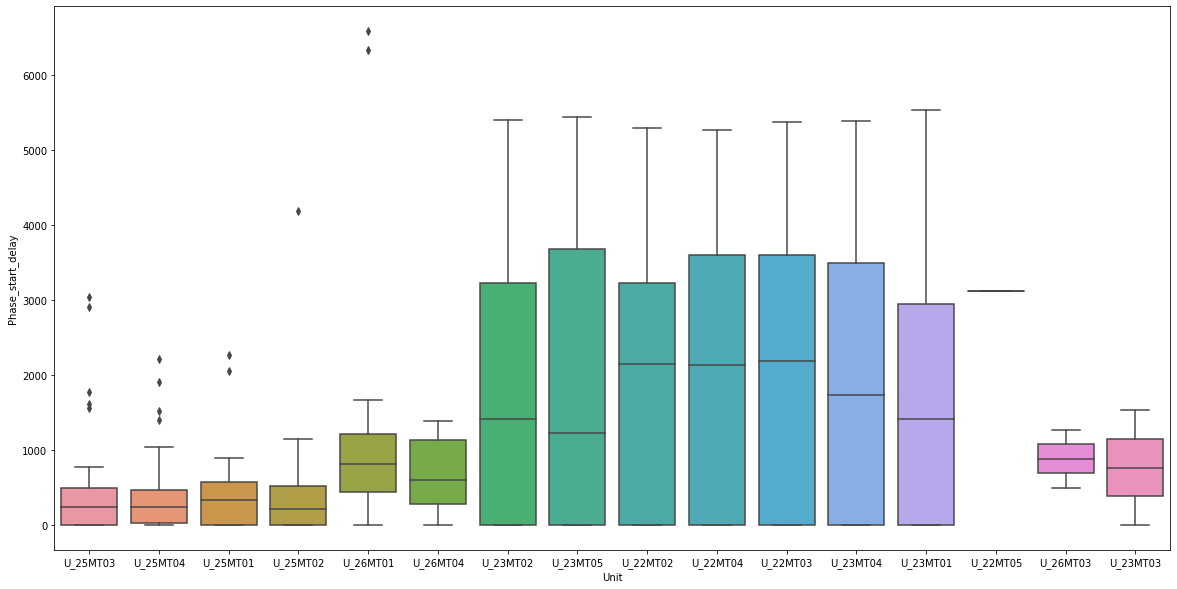

In [21]:
fig, ax = plt.subplots(1, figsize=(20, 10))
sns.boxplot(x='Unit',y='Phase_start_delay', data=df_filtered)

<Axes: xlabel='Unit', ylabel='Phase_overrun'>

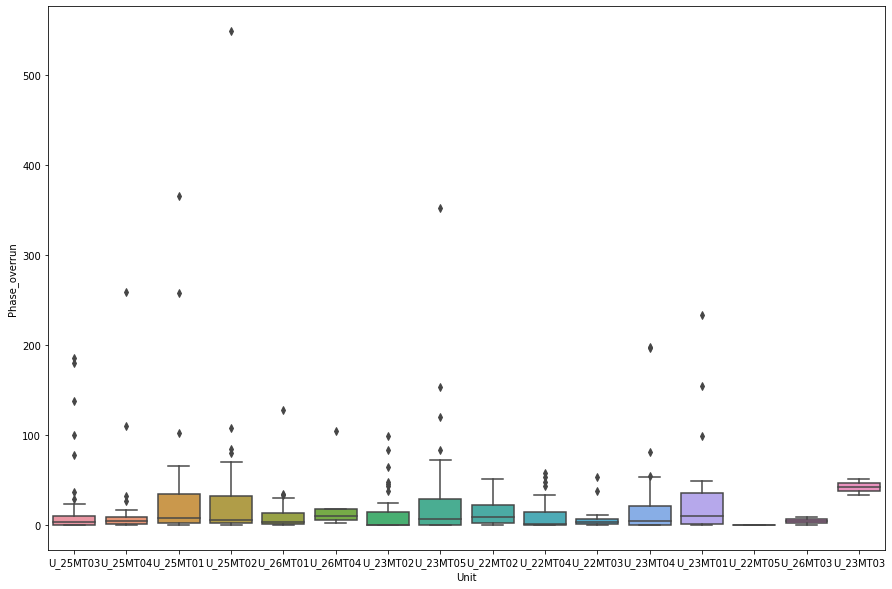

In [22]:
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.boxplot(x='Unit',y='Phase_overrun', data=df_filtered)

<Axes: xlabel='Phase_overrun'>

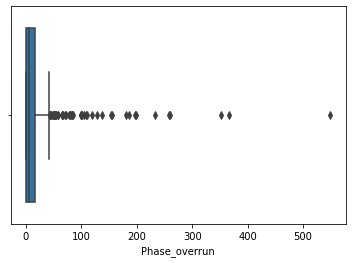

In [23]:
sns.boxplot(x=df_filtered["Phase_overrun"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


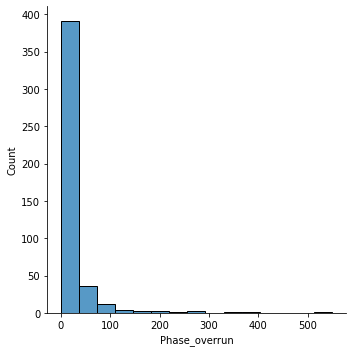

In [24]:
sns.displot(df_filtered["Phase_overrun"], bins = 15, kde = False)
plt.show()

In [25]:
# Filter the df vy the most commonly produced material 1775253 in terms of the deaeration phase
#df_filtered1 = df_filtered[(df_filtered['Material'] == 1775253)]
#print(df_filtered1)

In [26]:
### **3.2.5 Outlier detection - The isolation forest algorithm**

In [27]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df_filtered[['Phase_overrun']])
df_filtered['scores']=model.decision_function(df_filtered[['Phase_overrun']])
df_filtered['anomaly']=model.predict(df_filtered[['Phase_overrun']])
anomaly=df_filtered.loc[df_filtered['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

      Material    BATCHID      Unit Instruction_Step Material_ID  \
114    1002150  107996308  U_25MT03       STEP2_CONS  U_85MT11_1   
810    1172415  107684380  U_25MT04       STEP2_CONS  U_85MT33_1   
836    1172415  107769546  U_25MT03       STEP2_CONS     1172014   
1064   1172415  108045504  U_25MT03       STEP2_CONS  U_85MT25_1   
1120   1172415  108068558  U_25MT03       STEP2_CONS  U_85MT90_1   
1886   1368236  107880059  U_26MT01       STEP2_CONS  U_85MT33_1   
1915   1397022  107673784  U_25MT01       STEP2_CONS  U_86MT14_1   
1982   1397022  107899895  U_23MT05       STEP2_CONS  U_85MT21_1   
2047   1397022  107969769  U_22MT04       STEP2_CONS  U_85MT25_1   
2375   1418373  108083247  U_25MT04       STEP2_CONS  U_85MT11_2   
2632   1428047  107799473  U_23MT04       STEP2_CONS  U_86MT12_2   
3019   1451710  107689604  U_23MT02       STEP2_CONS  U_85MT14_1   
3051   1451710  107689605  U_23MT01       STEP2_CONS  U_85MT14_1   
3182   1451710  107801959  U_23MT04       STEP2_

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-27-217b038df573>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['scores']=model.decision_function(df_filtered[['Phase_overrun']])
<ipython-input-27-217b038df573>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['anomaly']=model.predict(df_filtered[['Phase_overrun']])


## Data - Removing Outliers 

In [28]:
df_filtered.shape 

(455, 19)

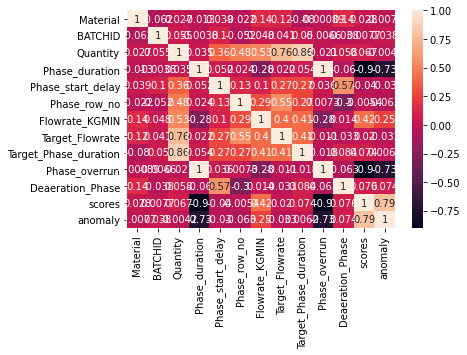

In [29]:
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [30]:
# Determines the number of tank units used to produce  batches of the material over a time period
Unit=df_filtered. Unit.value_counts()
Unit

U_25MT04    65
U_25MT03    59
U_23MT04    43
U_23MT02    40
U_23MT05    38
U_25MT02    37
U_26MT01    36
U_25MT01    35
U_22MT04    24
U_22MT02    21
U_22MT03    21
U_23MT01    20
U_26MT04    11
U_26MT03     2
U_23MT03     2
U_22MT05     1
Name: Unit, dtype: int64

In [31]:
#import pandas as pd

# Assuming df_filtered1 DataFrames are defined

# Create a new column 'QuantityRange' in df_filtered1 based on the 'Quantity' values of the deaeration phases , this is not the total quantity of the batch
#df_filtered1['QuantityRange'] = pd.cut(df_filtered1['Quantity'], bins=2, labels=['QuantityRange <= 1000', 'QuantityRange >= 1200'])

#print(df_filtered1)

In [32]:
df_filtered.describe()

,Material,BATCHID,Quantity,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration_Phase,scores,anomaly
count,4.550000e+02,4.550000e+02,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,1.585216e+06,1.078444e+08,684.157426,29.450549,1128.971429,12.551648,47.871699,60.480689,10.494505,19.854945,0.619780,0.069336,0.802198
std,3.699004e+05,1.508346e+05,424.543653,48.817484,1528.775762,3.165249,53.816639,23.391272,5.031998,48.354064,0.485975,0.072799,0.597716
min,1.002150e+06,1.075483e+08,17.100000,1.000000,0.000000,2.000000,0.130000,4.488600,4.000000,0.000000,0.000000,-0.337029,-1.000000
25%,1.408848e+06,1.077209e+08,389.750000,10.000000,0.000000,10.000000,14.736600,43.719600,8.000000,0.000000,0.000000,0.043947,1.000000
50%,1.607495e+06,1.078456e+08,763.300000,15.000000,407.000000,12.000000,35.517400,65.412400,10.000000,5.000000,1.000000,0.089127,1.000000
75%,1.775253e+06,1.079712e+08,817.050000,28.000000,1683.000000,15.000000,68.045850,79.016000,11.000000,17.000000,1.000000,0.125446,1.000000
max,3.055706e+06,1.080913e+08,2446.200000,557.000000,6582.000000,21.000000,631.526000,79.016000,31.000000,549.000000,1.000000,0.125446,1.000000


Box plots

Another way of analyzing numerical data would be to use box plots. Box plot shows us the median of the data, which represents where the middle data point is. The upper and lower quartiles represent the 75 and 25 percentile of the data respectively. The upper and lower extremes shows us the extreme ends of the distribution of our data. Finally, it also represents outliers, which occur outside the upper and lower extremes.

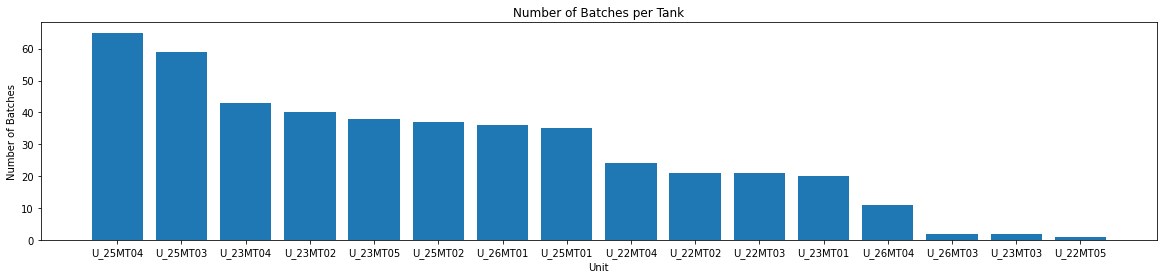

In [33]:
# Count the number of batches per tank
batch_counts = df_filtered['Unit'].value_counts()

# Plot the bar chart
plt.figure(figsize = (20,4))
plt.bar(batch_counts.index, batch_counts.values)
plt.xlabel('Unit')
plt.ylabel('Number of Batches')
plt.title('Number of Batches per Tank')
plt.show()

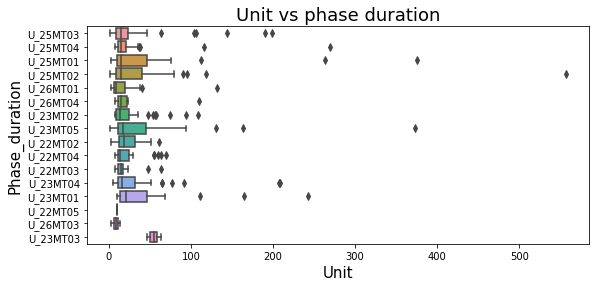

In [34]:
plt.figure(figsize = (9,4))
sns.boxplot(data =df_filtered,x = 'Phase_duration',y ="Unit")
plt.title("Unit vs phase duration", fontsize = 18)
plt.ylabel("Phase_duration", fontsize = 15)
plt.xlabel("Unit",fontsize = 15)
plt.show()

In [35]:
#df_Unit = df_filtered[['Material','Phase_duration','Flowrate_KGMIN','Unit','BATCHID','Phase_overrun','Target_Phase_duration','Phase_start_delay','Phase_start']]
#df_Unit

In [36]:
#explore the statistics of each feature exclusively
print(df_Unit.Phase_start_delay.describe())
print()
df_Unit.Phase_start_delay.plot(bins=50, kind='hist')

NameError: name 'df_Unit' is not defined

In [ ]:
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
#ref#https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
sns.regplot(x='Phase_duration',y='Phase_overrun',data=df_filtered)

In [ ]:
Filtered_df= uploaded1.query('Unit == "%s"' % 2503)
print(Filtered_df) 

In [ ]:
#Aggregate data per tank
aggregated_Filtered_df = Filtered_df.groupby('BATCHID').agg({
    'Phase_duration': 'mean',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_Filtered_df)

In [ ]:
#Aggregate data per tank
aggregated_Filtered_df = Filtered_df.groupby('Material_Name').agg({
    'Phase_duration': 'mean',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_Filtered_df)

In [ ]:
Filtered_df= uploaded1.query('Unit == "%s"' % 2504)
print(Filtered_df) 

In [ ]:
correlation_matrix = Filtered_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
Filtered_df.describe()

In [ ]:
#Filtered_df= df_Unit.query('Material == 1002150')
#print#Filtered_df) 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

# Sample data preparation and one-hot encoding, following from previous examples

df = pd.DataFrame(Filtered_df)

# One-Hot Encoding the 'Unit' column
df_encoded = pd.get_dummies(df, columns=['Unit'], prefix='Unit')

#print(df_encoded)
# Defining the independent variables (X) and the dependent variable (y)
X = df_encoded.drop(['Phase_overrun','Instruction_Step','Material_Name','Phase_end','Phase_start'], axis=1)
y = df_encoded['Phase_overrun']

# Model initialization
model = LinearRegression()

# Use a custom scorer to evaluate using RMSE during cross-validation
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform 5-fold cross validation and calculate RMSE scores
scores = cross_val_score(model, X, y, cv=5, scoring=rmse_scorer)

print("RMSE for each fold:", scores)
print("Average RMSE:", scores.mean())
#The code first sets up the dataset and the linear regression model. The cross_val_score function is then used to perform 5-fold cross-validation, returning the RMSE for each fold.


# Target Variable: The 'Phase_overrun' could be your target variable for regression, as you want to predict the overrun times.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = df_filtered[['Material', 'Unit','Phase_duration']]
y = df_filtered['Phase_overrun']

# One-hot encode categorical variables (Material and Tank)
X_encoded = pd.get_dummies(X, columns=['Material', 'Unit'], drop_first=True)


# Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

In [ ]:
#pip install matplotlib 

In [ ]:
#Determine any correlations between the variables in the df above 

In [ ]:
sns.heatmap(df_filtered.isnull())
plt.show()

In [ ]:
correlation_matrix = df_filtered.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize = (9,4))
sns.boxplot(data =df_filtered,x = 'Phase_duration',y ="Unit")
plt.title("Unit-wise Distribution of Price", fontsize = 18)
plt.ylabel("Unit", fontsize = 15)
plt.xlabel("Phase_duration",fontsize = 15)
plt.show()

In [ ]:
plt.title('Fiction vs Non Fiction')
sns.countplot(x='Unit', data=df_filtered)

In [ ]:
bestseller_books_price =df_filtered.sort_values("Unit", ascending= False)
plt.xticks(rotation = 90)
sns.barplot(x = 'Quantity',
            y = 'Phase_duration',
            data = bestseller_books_price, hue = "Unit");

In [ ]:
Unit=df_filtered. Unit.value_counts()
Unit

In [ ]:
columns_list= df_filtered.columns.tolist()
print(columns_list)

# one hot encoding 
We need to convert the tank ids into categorical dummy variables using one-hot encoding. This will create a binary column for each tank id 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for Tank_ID
encoder = OneHotEncoder()
tank_ids_encoded = encoder.fit_transform(df_filtered[['Unit']])